In [13]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn.metrics import r2_score
from tqdm import tqdm, trange
from pprint import pprint, pformat
import os
import matplotlib.pyplot as plt
import pdb

In [14]:
save_dir = "/global/scratch/users/aniketh/promoter_modelling/jax_data/saved_DEN_models_v12_TITAN/Jurkat_using_coms_0.001_THP1_weight_1.5.pkl_div_coef_5.0_ent_coef_1.0_bent_coef_5.0/"

In [15]:
val_seqs = np.load(os.path.join(save_dir, "val_sequences.npy"), allow_pickle=True)
val_seqs = np.argmax(val_seqs, axis=-1)
val_seqs = np.vectorize({0: 'A', 1: 'C', 2: 'G', 3: 'T'}.get)(val_seqs)
val_seqs = ["".join(i) for i in val_seqs]

In [16]:
val_seqs

['ATCGACGCGATACTAGAGATAGATAGTATAGAGATATATATATTTTATATATATATATATAATATATATATATATATATATATATATATATCGAGAGATAGATAAGTCGATAGATCGATAGTAGTCGTTAGTAGTTAGTATAGAGCTAGCGAGAGAGATAGTCGATAGATTAGTAGGTAGCGATAGAGGTATAGATAGATAGTAGATCTCGCGAGAGTTTTAGGTAGTTAGTATAGGTAAGTTAGTTAGT',
 'CTCGAGCGCGCGCGCGCGCGCGCCGTAGGTCTCGCGCGCGCGCGCGCGCGCGCGGCGCGCGCCGCGCGCGCGCGCGTCGCGAGGAGGGGTAGAGAGGTTAGGTAGAGGTAGGTAGTAGATATAGATAGTAGTAGGGAGATAGAGAGCGCGCGCGGGGGCGGGCGCGCGAGGCGCGCGCCGCGCGCGCGCGCGGCGCGCGCCCCGCGCGCGCGCGCCGCGCGCGCGCGCGGGTGGTGGGAGTGTGGTTATA',
 'TCGTCGATAGATAGATAGATATATATATATTTATTATATATAATATATATAATCTATAGATTATATATTATATCTCGCGAGAATTTATCGAGAGATTAGCTAGATTTCTCGAGAGATTTAGGTAGATATATAGATAGTTAATATAGATAGTAAGTAGGTTAGTTATCTCGATAGATTTAGTAATTAGTCGAGAGATTTAGGTAGGTAGGTTAGGTAGTAGGTAGAGTTAGTAGGTAGGTAGGGTAGGTAA',
 'AAAGGTTAGATATTATTTTATATATATATATTTTATTATATATAATTATATATATATATCGATAGATAGTAGGTATCGCGAGAGTTTAGATAGTAGATATAGTCTATATCGAGAGATTAGGTAGTTAATAGTTAGTTAGTAAAGTTAGTAGTAGTTAGATAGTCGATAGATATCGATAGATAGTATAGATAATCGATAGATTATCTAGATATATAGAGAAGGTAGGTTAGGTA

In [17]:
dataset_y = np.load(os.path.join(save_dir, "all_y.npy"), allow_pickle=True)[()]
dataset_pred = np.load(os.path.join(save_dir, "all_yhat.npy"), allow_pickle=True)[()]

optim_val_pred = np.load(os.path.join(save_dir, "all_predicted_exps_optim_val_set.npy"), allow_pickle=True)[()]

prefinal_pred = np.load(os.path.join(save_dir, "prefinal_sequences_predicted_exps.npy"), allow_pickle=True)[()]
prefinal_filter_out = np.load(os.path.join(save_dir, "prefinal_sequences_filter_out.npy"), allow_pickle=True)

prefinal_seqs = np.load(os.path.join(save_dir, "prefinal_sequences.npy"), allow_pickle=True)
prefinal_seqs = np.argmax(prefinal_seqs, axis=-1)
prefinal_seqs = np.vectorize({0: 'A', 1: 'C', 2: 'G', 3: 'T'}.get)(prefinal_seqs)
prefinal_seqs = ["".join(i) for i in prefinal_seqs]

final_pred = np.load(os.path.join(save_dir, "final_sequences_predicted_exps.npy"), allow_pickle=True)
final_seqs = np.load(os.path.join(save_dir, "final_sequences.npy"), allow_pickle=True)
final_seqs = np.argmax(final_seqs, axis=-1)
final_seqs = np.vectorize({0: 'A', 1: 'C', 2: 'G', 3: 'T'}.get)(final_seqs)
final_seqs = ["".join(i) for i in final_seqs]

In [18]:
df = pd.DataFrame()
df["sequence"] = prefinal_seqs
for cell in prefinal_pred:
    df[cell] = prefinal_pred[cell]
df["filter_out"] = prefinal_filter_out

In [19]:
df

,sequence,THP1,Jurkat,K562,filter_out
0,ATCGACGAGATACTAGAGATAGATAGTATAGAGATATATATATATT...,0.462103,1.058019,0.963480,True
1,CGCGAGAGCGCGCGCGCGCGCGCGGTGGGTCGCGCGCGAGCGCGCG...,1.842510,1.471579,2.419524,True
2,TCGTCGATAGATAGATAGATATATATATTTTTATTATATATATTAT...,0.229809,0.984016,0.664671,True
3,GTAGGTTAGATATTATTATATATATATATATTTTATTTTATATAAA...,0.363411,0.977915,1.025898,True
4,GCGAGCGTCGGCTCGATTATATCGATAGGGTCGCGCGCGCGCGGGG...,2.228982,1.508836,2.816618,True
...,...,...,...,...,...
499995,GCGCGCGCGCGAGAGTCGCGCGAGTCGCGTCGTCGTCGGGCGCGGG...,2.318165,1.496245,2.781900,True
499996,CGGGGTGGGTCGCGCGAGATAGCGAGTCGCGCCGCGCGCCCGCGCG...,1.661322,1.487754,2.163482,True
499997,GTTGGGTTATCTCGCGAGAGCGCGCGGCGCGCGCGGCGCGCGCGCG...,2.452312,1.438241,2.882071,True
499998,TCAGGAGATTATAGGTAGTATATATATATATAGATATATATATATA...,0.430919,1.044756,0.919105,True


In [20]:
cells = ["THP1", "Jurkat", "K562"]
final_df = pd.DataFrame()
final_df["sequence"] = final_seqs
for i, cell in enumerate(cells):
    final_df[cell] = final_pred[:, i]
final_df

,sequence,THP1,Jurkat,K562
0,CGTCGTCGAGTCGCGAGCGTCTCGCGCGCGCGTCGCGCGCGTGGCG...,0.831958,1.378788,1.343747


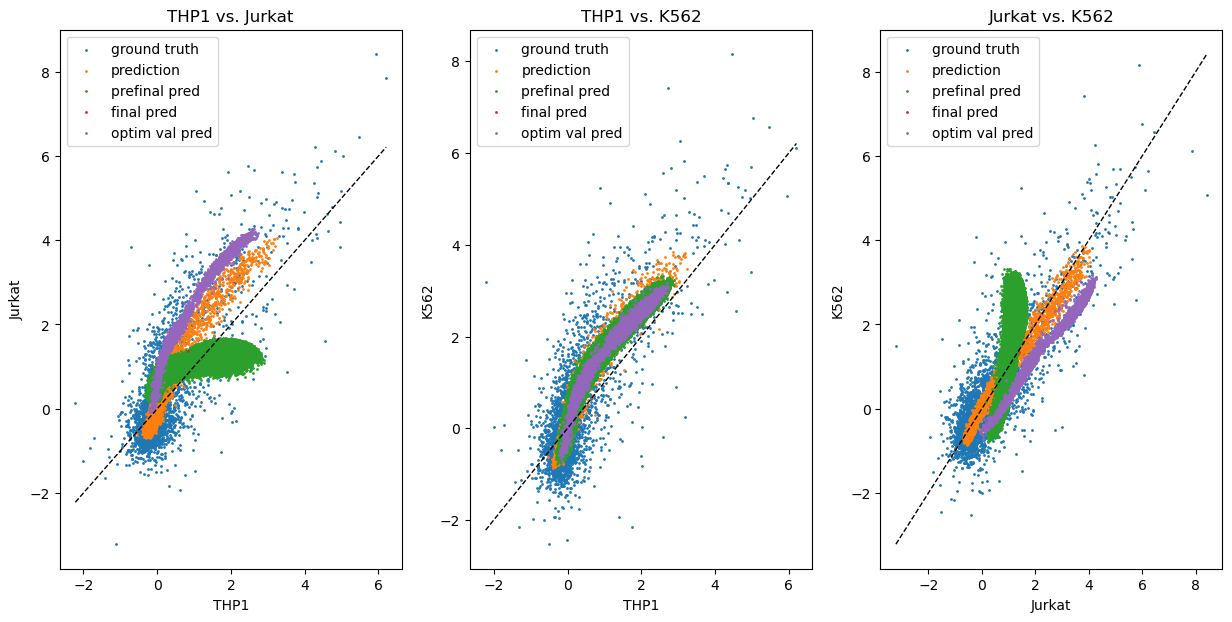

In [21]:
cells = ["THP1", "Jurkat", "K562"]
fig, axes = plt.subplots(1, 3, figsize=(15, 7))
count = 0
for i, k in enumerate(cells):
    for j, k2 in enumerate(cells):
        if i >= j:
            continue
        axes[count].scatter(dataset_y[k], dataset_y[k2], s=1, label="ground truth")
        axes[count].scatter(dataset_pred[k], dataset_pred[k2], s=1, label="prediction")
        axes[count].scatter(prefinal_pred[k], prefinal_pred[k2], s=1, label="prefinal pred")
        axes[count].scatter(final_pred[:, i], final_pred[:, j], s=1, label="final pred")
        axes[count].scatter(optim_val_pred[k], optim_val_pred[k2], s=1, label="optim val pred")

        # draw x=y line
        axes[count].plot(
            [dataset_y[k].min(), dataset_y[k].max()],
            [dataset_y[k].min(), dataset_y[k].max()],
            'k--',
            lw=1
        )

        axes[count].set_xlabel(k)
        axes[count].set_ylabel(k2)
        axes[count].legend()
        axes[count].set_title(k + ' vs. ' + k2)
        count += 1

plt.show()